# P-DBM (Probabilistic Drag Based Model) to predict CME arrival time in Heliosphere Demo

This notebook demonstrates how to use `DBM1D` and `DBM2D` class to simulate the propagation of CME in the heliosphere. 

# Setup and Imports

First, let's import all the necessary libraries and setup our enviroment. This ensures we have everything needed to perform (P-)DBM calculations. 

In [1]:
from datetime import datetime

# Custom class for (P-)DBM calculation.
import dbm_functions as dbm
from calculation_1D import DBM1D
from calculation_2D import DBM2D

# 1D (P-)DBM calculation.

This section demonstrates use of `DBM1D` class to perform (P-)DBM calculations.
We start with classic DBM calculation in the simplest form.

## DBM:
In this case `P_DBM = False` is our input.
Therefore all the inputs associated to uncertanitities doesn't required and their values are taken as `None`.
Even, if you provide the values for uncertanities, values will be ignored.

### Input Conditions
#### CME boundary conditions

In [2]:
# Initial height of CME for model in unit of solar radius
R0 = 21.5

# Initial speed of CME at Rs and error associated with it (unit is km/s) [From cone model]
V0 = 1000

# Time stamp correspond to CME position at Rs and associated uncertainity
Time_UTC = datetime(2025, 2, 24, 0, 0)

#### Model inputs | Manual Values

In theory, values of model parameters (w,$\gamma$) is unknown. So, one has to provide estimated values for this.
To address this problem we investigated value ranges of these two parameters in [Mugatwala et al.,2024](https://doi.org/10.1051/swsc/2024004) and [Chierichini et al.,2024](https://doi.org/10.1051/swsc/2023032). In the mentioned studies, we have obtained a Probabilistic distribution functions for these free parameters. This allow us to use data driven values of (w,$\gamma$) insted of any arbitrary values.
This features is enabled by calling `auto_dbm = True`. Since, we are focusing on manual values here we turn off this automatic values.

In [3]:
# which is ambient solar wind speed in unit of km/s
w = 400

# drag parameter in km-1. This is standard value from Vrsnak et al 2013
gamma = 0.2e-7

##### simulation

In [4]:
# initiate the class to validate the inputs
dbm1D = DBM1D(
    time_utc=Time_UTC,
    r0=R0,
    v0=V0,
    target_name="Earth",
    P_DBM=False,
    auto_dbm=False,
    wind_type="Slow",
    w=w,
    gamma=gamma,
)

# perform predictions
predictions = dbm1D.P_DBM_run()
predictions

ic| tjd: 2460730.5
ic| self.r1: 148049668.18042716
ic| t_arrival_UTC: '2025-02-26 03:41'


{'Transit_time_mean': 51.684245868700536,
 'Arrival_speed_mean': 585.5999540220746,
 'Arrival_time': '2025-02-26 03:41',
 'RVT_plot': <_io.BytesIO at 0x7e522f8edb80>,
 'Travel_distance': 0.989650905375,
 'Initial_speed': 1000,
 'w_median': 400,
 'gamma_median': 2e-08,
 'Target': 'Earth'}

In [13]:
print("+" * 50)
print("DBM Predictions")
print("+" * 50)

print(f"Transit time of CME is {predictions['Transit_time_mean']:.2f} hr.")
print(
    f"Arrival speed of CME at {predictions['Target']} is {predictions['Arrival_speed_mean']:.2f} km/s. "
)
print(f"CME travel distance is {predictions['Travel_distance']:.3f} AU.")
print(f"CME arrival date and time: {predictions['Arrival_time']}.\n")

print("+" * 50)
print("DBM model parameters.")
print("+" * 50)
print(f"Ambient Solar wind speed w = {predictions['w_median']:.2f} km/s.")
print(f"Drag parameter $\gamma$ : {predictions['gamma_median']} km$^{-1}$.")

++++++++++++++++++++++++++++++++++++++++++++++++++
DBM Predictions
++++++++++++++++++++++++++++++++++++++++++++++++++
Transit time of CME is 72.64 hr.
Arrival speed of CME at Earth is 421.12 km/s. 
CME travel distance is 0.990 AU.
CME arrival date and time: 2025-02-27 00:38.

++++++++++++++++++++++++++++++++++++++++++++++++++
DBM model parameters.
++++++++++++++++++++++++++++++++++++++++++++++++++
Ambient Solar wind speed w = 370.82 km/s.
Drag parameter $\gamma$ : 6.993821808604875e-08 km$^-1$.


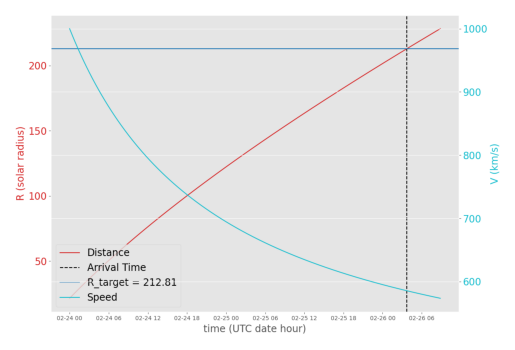

In [10]:
# plot kinematics.
dbm.show_plots(predictions["RVT_plot"])

#### Model inputs | Auto Choice
In this case we have to just simply put `auto_dbm=True`. Therfore manual values for (w,$\gamma$) will be replaced by the values from the PDF mentioned above. Additionally, we have to choose solar wind type.

##### Simulation

In [14]:
# initiate the class to validate the inputs
dbm1D = DBM1D(
    time_utc=Time_UTC,
    r0=R0,
    v0=V0,
    target_name="Earth",
    P_DBM=False,
    auto_dbm=True,
    wind_type="Slow",
)

# perform predictions
predictions = dbm1D.P_DBM_run()
predictions


ic| tjd: 2460730.5
ic| self.r1: 148049668.18042716
ic| t_arrival_UTC: '2025-02-27 00:26'


{'Transit_time_mean': 72.44914815763723,
 'Arrival_speed_mean': 422.21245036347193,
 'Arrival_time': '2025-02-27 00:26',
 'RVT_plot': <_io.BytesIO at 0x7e522e46c3b0>,
 'Travel_distance': 0.989650905375,
 'Initial_speed': 1000,
 'w_median': 371.56896022961075,
 'gamma_median': 6.960671519299665e-08,
 'Target': 'Earth'}

In [15]:
print("+" * 50)
print("DBM Predictions")
print("+" * 50)

print(f"Transit time of CME is {predictions['Transit_time_mean']:.2f} hr.")
print(
    f"Arrival speed of CME at {predictions['Target']} is {predictions['Arrival_speed_mean']:.2f} km/s. "
)
print(f"CME travel distance is {predictions['Travel_distance']:.3f} AU.")
print(f"CME arrival date and time: {predictions['Arrival_time']}.\n")

print("+" * 50)
print("DBM model parameters.")
print("+" * 50)
print(f"Ambient Solar wind speed w = {predictions['w_median']:.2f} km/s.")
print(f"Drag parameter $\gamma$ : {predictions['gamma_median']} km$^{-1}$.")


++++++++++++++++++++++++++++++++++++++++++++++++++
DBM Predictions
++++++++++++++++++++++++++++++++++++++++++++++++++
Transit time of CME is 72.45 hr.
Arrival speed of CME at Earth is 422.21 km/s. 
CME travel distance is 0.990 AU.
CME arrival date and time: 2025-02-27 00:26.

++++++++++++++++++++++++++++++++++++++++++++++++++
DBM model parameters.
++++++++++++++++++++++++++++++++++++++++++++++++++
Ambient Solar wind speed w = 371.57 km/s.
Drag parameter $\gamma$ : 6.960671519299665e-08 km$^-1$.


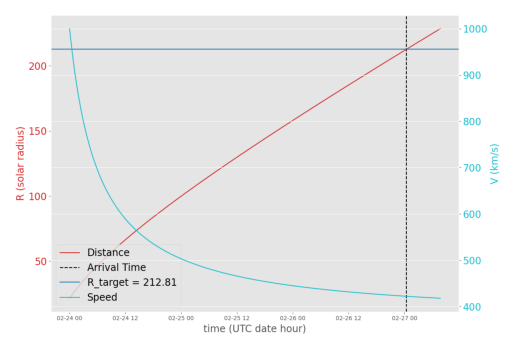

In [16]:
# plot kinematics.
dbm.show_plots(predictions["RVT_plot"])
